In [1]:
from kamo.light_shift.compute_polarizabilities import ComputePolarizabilities
import numpy as np
import matplotlib.pyplot as plt

cp = ComputePolarizabilities()

In [7]:
cp.pdp.determine_allowed_final_states(5,1,1/2)

['3d3/2',
 '4s1/2',
 '4d3/2',
 '5s1/2',
 '5d3/2',
 '6s1/2',
 '6d3/2',
 '7s1/2',
 '7d3/2',
 '8s1/2',
 '8d3/2',
 '9s1/2',
 '9d3/2',
 '10s1/2',
 '10d3/2',
 '11s1/2',
 '11d3/2',
 '12s1/2',
 '12d3/2',
 '13s1/2',
 '13d3/2',
 '14s1/2',
 '14d3/2',
 '15s1/2',
 '15d3/2',
 '16s1/2',
 '16d3/2']

In [2]:
cp.compute_fine_structure_polarizability(4,0,1/2,1227.67e-9)

(array([467.57859961]), array([-2.81218035]), array([0.]))

In [10]:
import time

t0 = time.time()
wavelengths_5pmagic = np.linspace(1066.,1070.,1000) * 1.e-9
alpha_4s_5pmagic, _, _ = cp.compute_fine_structure_polarizability(4,0,1/2,wavelength_m=wavelengths_5pmagic)
alpha_5p_5pmagic, _, _ = cp.compute_fine_structure_polarizability(5,1,1/2,wavelength_m=wavelengths_5pmagic)
print(time.time() - t0)

25.28879976272583


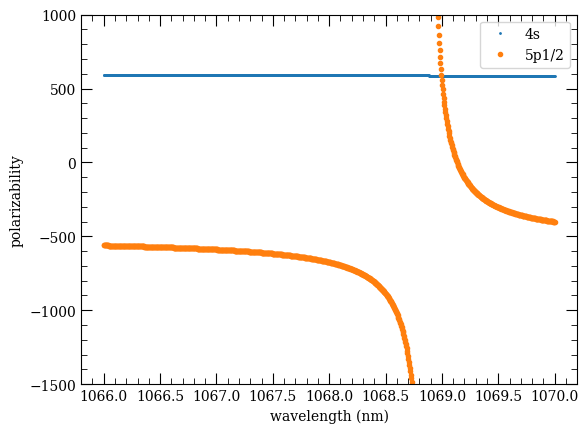

In [11]:
plt.figure()
yylim1 = [-1500,1000]
msize = 2
plt.plot(wavelengths_5pmagic*1.e9,alpha_4s_5pmagic,'.',markersize=msize)
plt.plot(wavelengths_5pmagic*1.e9,alpha_5p_5pmagic,'.')
plt.xlabel("wavelength (nm)")
plt.ylabel("polarizability")
plt.legend(['4s','5p1/2'])
plt.ylim(yylim1)
plt.show()

In [7]:
import time

t0 = time.time()
wavelengths_D1magic = np.linspace(1200.,1260.,3000) * 1.e-9
alpha_4s_D1magic, _, _ = cp.compute_fine_structure_polarizability(4,0,1/2,wavelength_m=wavelengths_D1magic)
alpha_4p_D1magic, _, _ = cp.compute_fine_structure_polarizability(4,1,1/2,wavelength_m=wavelengths_D1magic)
print(time.time() - t0)

78.0169939994812


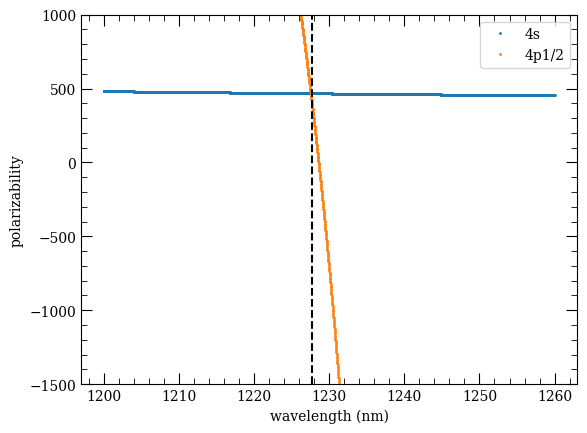

In [14]:
plt.figure()
yylim2 = [-1500,1000]
msize = 2
plt.plot(wavelengths_D1magic*1.e9,alpha_4s_D1magic,'.',markersize=msize)
plt.plot(wavelengths_D1magic*1.e9,alpha_4p_D1magic,'.',markersize=msize)
plt.xlabel("wavelength (nm)")
plt.ylabel("polarizability")
plt.legend(['4s','4p1/2'])
plt.vlines(1227.67,ymin=yylim2[0],ymax=yylim2[1],linestyles='--',colors='k')
plt.ylim(yylim2)
plt.show()

In [12]:
def find_magic_wavelength(alphas0,alphas1,wavelengths):
    if len(alphas0) != len(alphas1):
        raise ValueError("The polarizability lists must be of the same length.")
    if (len(alphas0) != len(wavelengths)):
        raise ValueError("The wavelength list(s) must match that of the polarizabilities.")
    idx = np.argmin( np.abs(alphas0 - alphas1) )
    if (idx == 0) or (idx == len(alphas0)):
        print("Warning: the intersection point returned is at the beginning/end of the list. This may be accurate, but is likely in error.")
    return wavelengths[idx]